You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
    based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:


Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis or scenario testing to explore the uncertainty and
risks.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


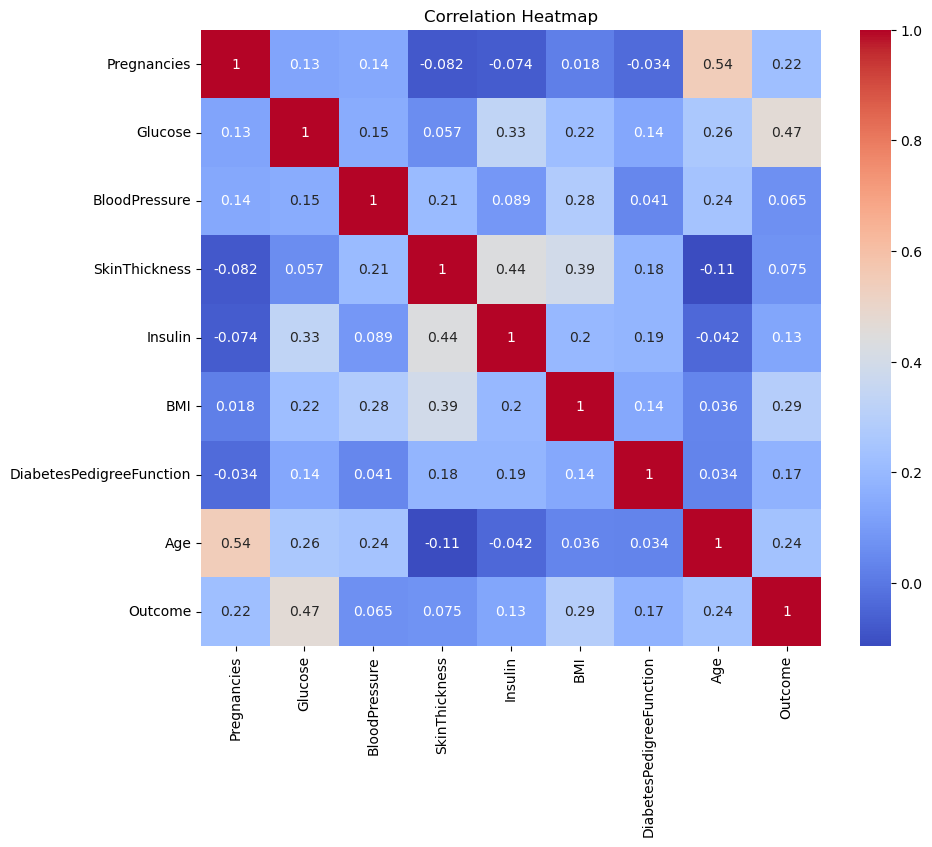

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

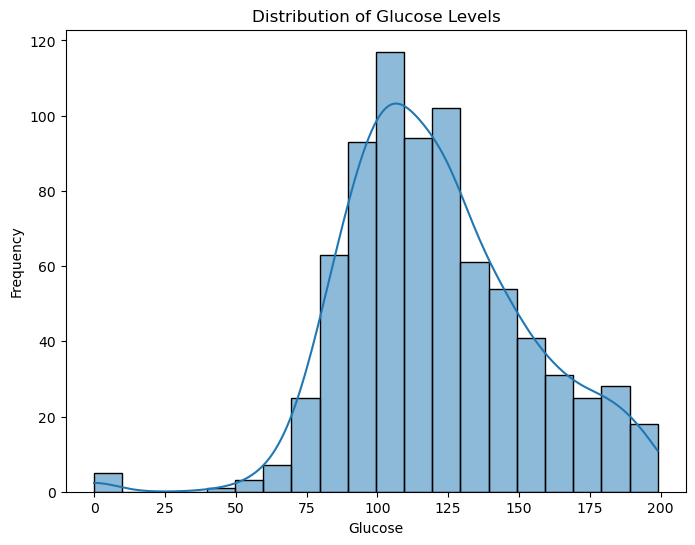

In [6]:
# Distribution of a Glucose	
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

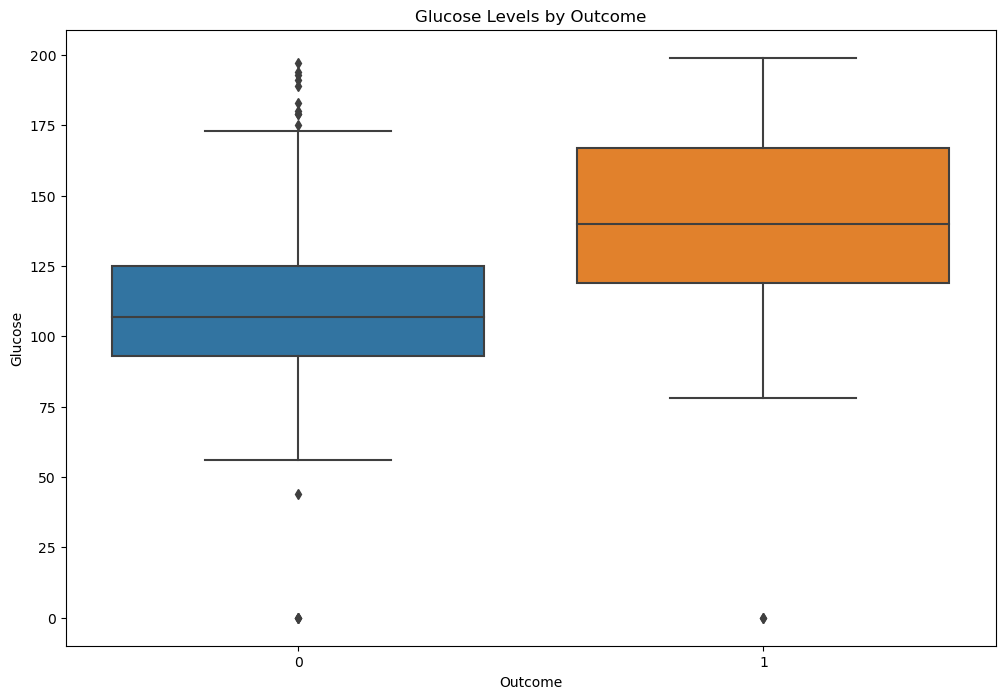

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


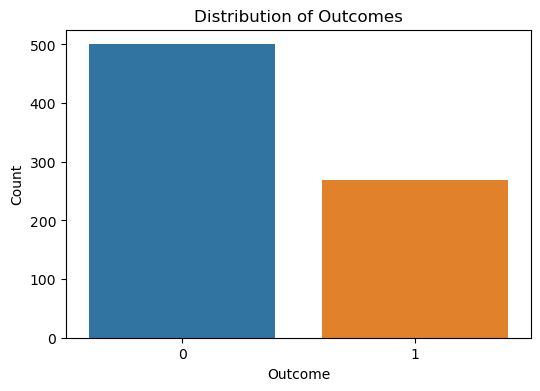

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


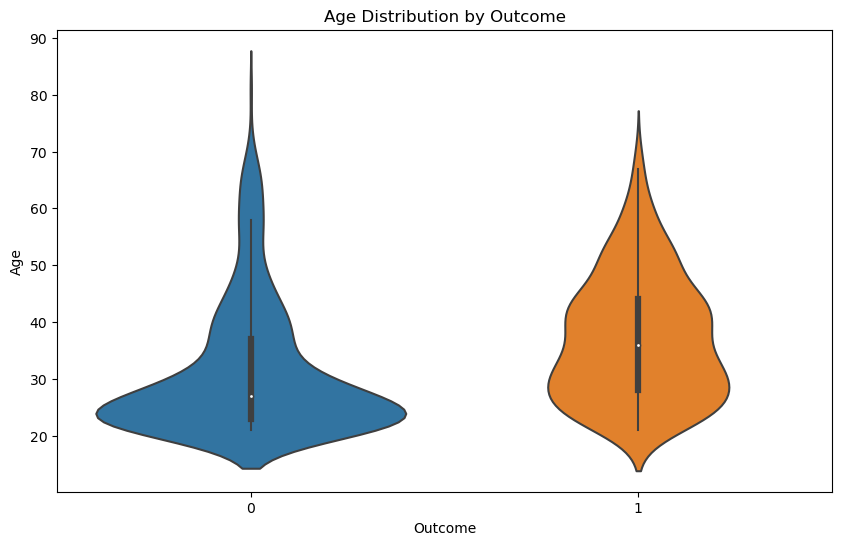

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Age', data=df)
plt.title('Age Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Conclusion - No missing values are there

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1



In [12]:
lower_bound = Q1 - 0.2 * IQR
upper_bound = Q3 + 0.2 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)


In [13]:
df= df[~outliers]


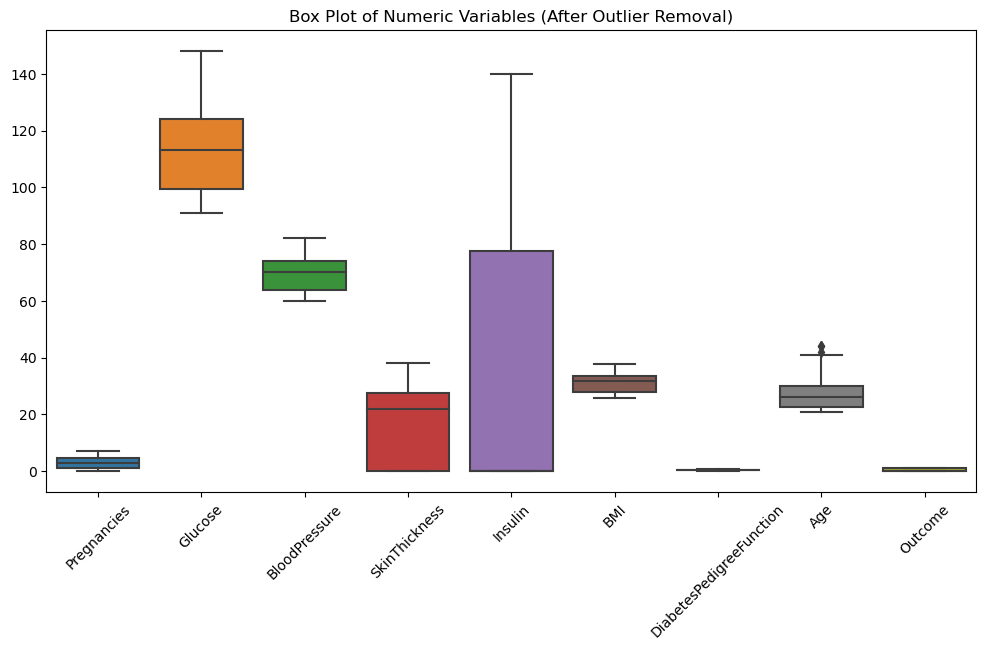

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[float, int]))
plt.title('Box Plot of Numeric Variables (After Outlier Removal)')
plt.xticks(rotation=45)
plt.show()

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state = 42)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((63, 8), (16, 8), (63,), (16,))

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [19]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [22]:
grid = GridSearchCV(classifier,param_grid = params , cv = 5, scoring = 'accuracy')

In [23]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [24]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [25]:
y_pred = grid.predict(X_test)

In [26]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
print(r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

-1.0363636363636362
0.5625
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.33      0.40      0.36         5

    accuracy                           0.56        16
   macro avg       0.52      0.52      0.52        16
weighted avg       0.59      0.56      0.57        16

[[7 4]
 [3 2]]


In [28]:
from sklearn.metrics import roc_curve,auc

# Plot ROC curve with AUC score
roc = roc_curve(y_test, y_pred, pos_label=1)

In [29]:
roc

(array([0.        , 0.36363636, 1.        ]),
 array([0. , 0.4, 1. ]),
 array([2, 1, 0]))

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'log_loss',max_depth =  3, max_features= 'sqrt', splitter = 'random')

In [34]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_features='sqrt',
                       splitter='random')

[Text(0.625, 0.875, 'x[6] <= 0.668\nlog_loss = 0.883\nsamples = 63\nvalue = [44, 19]'),
 Text(0.5, 0.625, 'x[3] <= 31.316\nlog_loss = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.25, 0.375, 'x[7] <= 21.589\nlog_loss = 0.918\nsamples = 51\nvalue = [34, 17]'),
 Text(0.125, 0.125, 'log_loss = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.375, 0.125, 'log_loss = 0.968\nsamples = 43\nvalue = [26, 17]'),
 Text(0.75, 0.375, 'x[0] <= 2.171\nlog_loss = 0.722\nsamples = 10\nvalue = [8, 2]'),
 Text(0.625, 0.125, 'log_loss = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.875, 0.125, 'log_loss = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.625, 'log_loss = 0.0\nsamples = 2\nvalue = [2, 0]')]

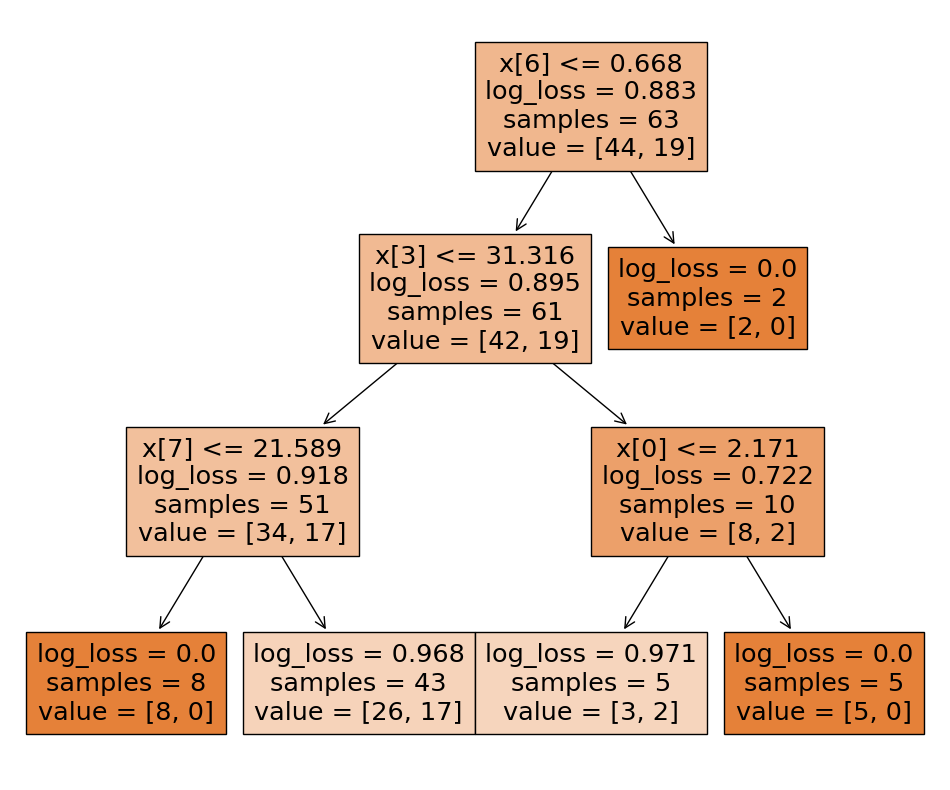

In [35]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(classifier,filled = True)

In [40]:
# Perform sensitivity analysis by changing the value of one feature at a time
for feature in df.columns:
    df_temp = df.copy()
    df_temp[feature] = df_temp[feature].apply(lambda x: 1 if x > 0 else 0)
    classifier.fit(df_temp[feature].values.reshape(-1, 1), df_temp['Outcome'].values)
    print('Accuracy for {} = {}'.format(feature, classifier.score(df_temp[feature].values.reshape(-1, 1), df_temp['Outcome'].values)))

# Summarize the results of the sensitivity analysis
print('Feature\tAccuracy')
for feature in df.columns:
    print('{}\t{}'.format(feature, classifier.score(df_temp[feature].values.reshape(-1, 1), df_temp['Outcome'].values)))

Accuracy for Pregnancies = 0.6962025316455697
Accuracy for Glucose = 0.6962025316455697
Accuracy for BloodPressure = 0.6962025316455697
Accuracy for SkinThickness = 0.6962025316455697
Accuracy for Insulin = 0.6962025316455697
Accuracy for BMI = 0.6962025316455697
Accuracy for DiabetesPedigreeFunction = 0.6962025316455697
Accuracy for Age = 0.6962025316455697
Accuracy for Outcome = 1.0
Feature	Accuracy
Pregnancies	0.379746835443038
Glucose	0.3037974683544304
BloodPressure	0.3037974683544304
SkinThickness	0.3291139240506329
Insulin	0.45569620253164556
BMI	0.3037974683544304
DiabetesPedigreeFunction	0.3037974683544304
Age	0.3037974683544304
Outcome	1.0
